In [1]:
import numpy as np
import pandas as pd

In [2]:
#importing only daily rental data set
data_path = "E:\Shubham\DATA Scientist\Bike Sharing\day.csv"
data_set = pd.read_csv(data_path)

In [3]:
data_set.columns #checking proper data set loaded and columns available

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
data_set.shape

(731, 16)

In [5]:
data_set.head(5) 
#instant column can be dropped as it is not contributing in the bike renting.

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
data_set.drop(columns=["instant"], inplace = True)

In [7]:
data_set.shape #dropped the column

(731, 15)

In [8]:
data_set.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
data_set.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
#Now We will do Exploratory Data Analysis
#Analyzing the our Target Variable cnt
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='cnt'>

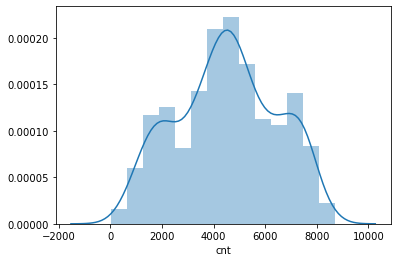

In [11]:
#regression model assume data to be normal Distribution 
#while Decission tree and Random forest can resist to certain limit 
#so it is important to understant the skewness present in data.

sns.distplot(data_set["cnt"])

In [12]:
#skewness and kurtosis
print("Skewness: %f" % data_set['cnt'].skew())
print("Kurtosis: %f" % data_set['cnt'].kurt())

Skewness: -0.047353
Kurtosis: -0.811922


<AxesSubplot:>

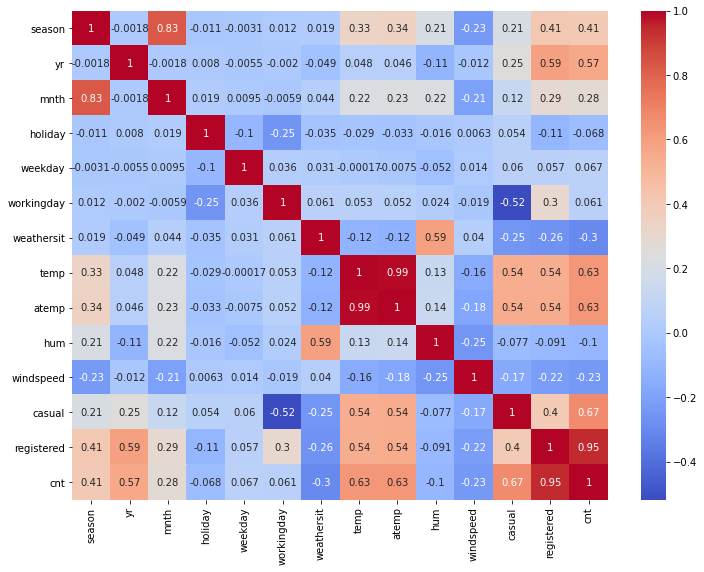

In [13]:
# the target data is fairly distributed 
#it's curve is like normal distribution.
# let's try to understand the correlation between features and cnt
corel = data_set.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corel, cmap ='coolwarm', annot = True)

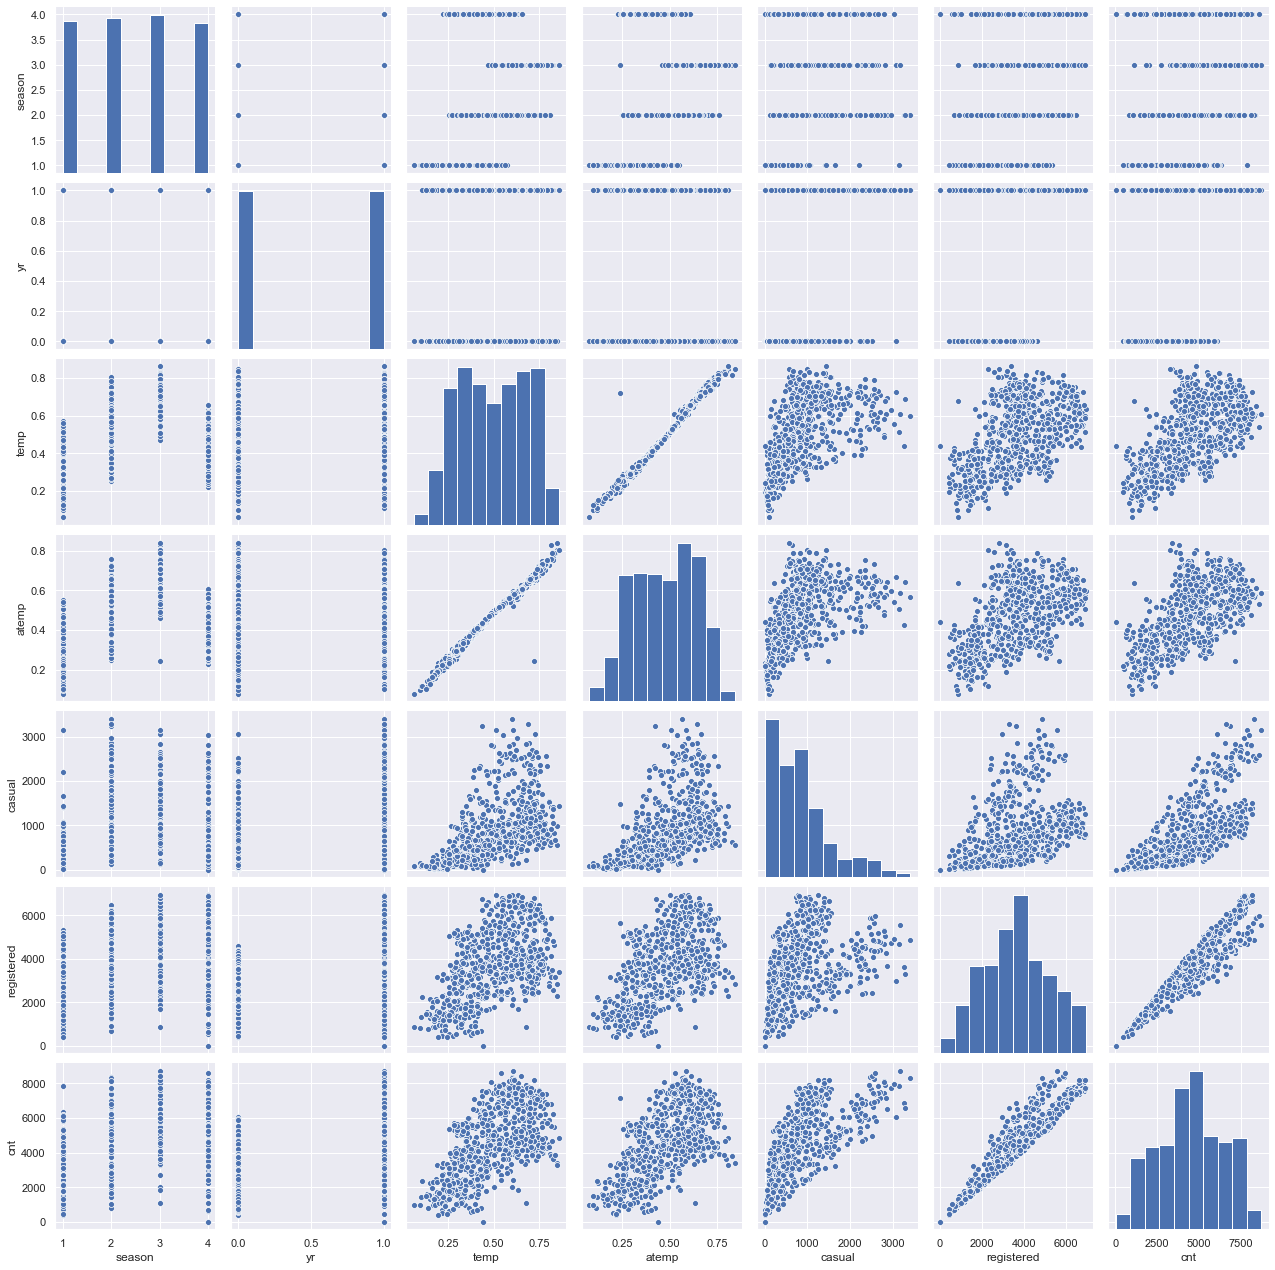

In [14]:
#Season, yr, temp, atemp, casual, registered have better correlation with cnt
#now we will probe more in these feature to get insight
#it is also visible that correlation value for temp and atemp is 0.99 which means one of them is redundant 
#(we will explore each with scatter plot)
#scatterplot
sns.set()
cols = ['season', 'yr','temp','atemp','casual','registered','cnt']
sns.pairplot(data_set[cols], height = 2.5)
plt.show();

In [15]:
#except for one annomaly both temp and atemp are highly corelated. So we can drop one from analysis now. 
#if underfitting happens then we can include it again
data_set.drop(columns = ['atemp'], inplace = True)
data_set.shape

(731, 14)

In [17]:
data_set.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [18]:
#we see that dteday data type is not datatime64
data_set["dteday"] = pd.to_datetime(data_set["dteday"])

In [19]:
data_set.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [20]:
#extracting date out of the dteday
data_set["Date"] = data_set["dteday"].dt.day


In [21]:
data_set.head(5)


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,Date
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985,1
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801,2
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349,3
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562,4
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600,5


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = data_set.drop(columns = ["cnt","dteday"])
y = data_set["cnt"]


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = True, random_state = 50)

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, shuffle = True, random_state = 50)

In [40]:
# now we have three data set for trainig(0.6), validation(0.2), test(0.2)
#we can apply simple linear regression first,
#if the complexity is more (mae error is more) we can go to Xgboost or further Advanced regression modelling
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [41]:
Cnt_lm_pred = lm.predict(X_val)

In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val,Cnt_lm_pred)

4.236436643960548e-24

In [45]:
Cnt_lm_pred

array([5315., 3331., 2935., 7691., 6398., 1815., 1550., 6861., 5713.,
       7605., 6857., 7736., 2802., 2566., 7001., 4097., 4339., 6169.,
       3659., 7335., 4553., 4765., 4579., 1510., 3392., 2432., 3389.,
       1526., 5084.,  623., 1096., 3709., 3727., 4154., 2431., 4788.,
       4916., 4274., 4023., 7534., 1913., 8009., 4492., 4713., 3429.,
       5362., 3523., 3249., 3922., 1317., 7525., 4521., 6904., 2895.,
       4338., 6043., 2402., 7333., 1842., 6966., 7175., 2236., 6978.,
       1461., 4991., 3005., 4342., 5119., 5409., 2914., 5375., 6544.,
       5558., 5464., 5336., 3761., 3487., 5323., 2843., 4649., 6269.,
       4195., 5501., 3777., 1891., 2034., 7286., 1471., 6685., 4656.,
       4835., 4844., 7261., 7384., 6034., 1635., 4839., 6133., 1817.,
       4456., 6053., 7572., 5992., 2743.,  920., 4677., 5170., 5202.,
       7148., 2832., 5728., 2918., 4639., 4326., 4332., 1450., 4186.,
       2077., 3228., 7460., 5847., 3958., 4833., 6227., 6691., 2132.,
       3873., 3542.,

In [46]:
y_val

677    5315
302    3331
381    2935
648    7691
468    6398
       ... 
256    4785
306    3974
590    6883
15     1204
73     2056
Name: cnt, Length: 176, dtype: int64

In [49]:
Cnt_test_pred = lm.predict(X_test)

In [50]:
mean_squared_error(y_test,Cnt_test_pred)

4.283208615853265e-24

In [51]:
Cnt_test_pred

array([3613., 3285., 4985., 4220., 5010., 3425., 5138., 4672., 3784.,
       4475., 8167., 3422., 6140., 3376., 6235., 1000., 5046., 4352.,
       4649., 1683., 7836., 7965., 2927., 5875., 7702., 2028., 8227.,
       5115., 5117., 5099., 3786., 7055., 3117., 4258., 5810., 5424.,
       1349., 6241., 2424., 6230., 5538., 6233., 6296., 4792., 5847.,
       1650., 4098., 5936., 5557., 3068., 2429., 6421., 4075., 2999.,
       1865., 6203., 7393., 1796., 6889., 6624., 2729., 1162., 4669.,
       7290., 2298.,   22., 4318., 4586., 3520., 3820., 2227., 4725.,
       4845., 3784., 5633., 4040., 2368., 4795., 1096., 4602., 4274.,
       4363., 3872.,  822., 4308., 6664., 4773., 4333.,  959., 7421.,
       7693., 1013., 4866., 7282., 5687., 5478., 4595., 3485., 6569.,
       4460., 2660., 3910., 2485., 1529., 2395., 3387., 1712., 5217.,
       4509., 5986., 6093., 4036., 7040., 5918., 3272., 6734., 2416.,
       4189., 4266., 6299., 4590., 7767., 3126., 3907., 3372., 5611.,
       2710., 8090.,

In [52]:
y_test

333    3613
203    3285
279    4985
483    4220
267    5010
       ... 
34     1708
676    5035
707    5582
496    7030
252    5345
Name: cnt, Length: 147, dtype: int64

In [ ]:
# As it is predicting with very less error we can conclude it.